In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo os arquivos de dados

In [6]:
data_forms = pd.read_csv("construction_data_forms.csv")
data_tasks = pd.read_csv("construction_data_tasks.csv")

# Entendendo os conjuntos de dados




In [ ]:
print(data_forms.shape)
print(data_tasks.shape)

(10254, 17)
(12424, 19)


In [ ]:
data_forms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ref                  10254 non-null  object
 1   Status               10254 non-null  object
 2   Location             10254 non-null  object
 3   Name                 10254 non-null  object
 4   Created              10254 non-null  object
 5   Type                 10254 non-null  object
 6   Status Changed       10254 non-null  object
 7   Open Actions         10254 non-null  int64 
 8   Total Actions        10254 non-null  int64 
 9   Association          2098 non-null   object
 10  OverDue              10254 non-null  bool  
 11  Images               10254 non-null  bool  
 12  Comments             10254 non-null  bool  
 13  Documents            9450 non-null   object
 14  Project              10254 non-null  int64 
 15  Report Forms Status  10252 non-null  object
 16  Repo

**células nulas - forms**
- Association 2098
- Documents 9450

### dados nulos do forms

In [ ]:
data_forms['Association'].value_counts(dropna=False)

NaN       8156
parent    1702
child      396
Name: Association, dtype: int64

In [ ]:
data_forms['Documents'].value_counts(dropna=False)

False    8370
True     1080
NaN       804
Name: Documents, dtype: int64

---

In [ ]:
data_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12424 entries, 0 to 12423
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ref             12424 non-null  object 
 1   Status          12424 non-null  object 
 2   Location        12424 non-null  object 
 3   Description     12424 non-null  object 
 4   Created         12424 non-null  object 
 5   Target          2568 non-null   float64
 6   Type            12424 non-null  object 
 7   To Package      11382 non-null  object 
 8   Status Changed  12424 non-null  object 
 9   Association     9483 non-null   object 
 10  OverDue         12424 non-null  bool   
 11  Images          12272 non-null  object 
 12  Comments        11902 non-null  object 
 13  Documents       11780 non-null  object 
 14  Priority        2366 non-null   object 
 15  Cause           9683 non-null   object 
 16  project         12424 non-null  int64  
 17  Report Status   12424 non-null 

**celulas nulas**
- target 2568
- Association 9483
- Priority 2366
- Cause 9683
- Task Group 12374
- Documents 11780
- comments 11902
[...]

In [ ]:
data_forms['Type'].value_counts(dropna=False)

Site Management              2984
Safety Forms                 2141
Quality 01 Structural        1729
Quality 02 Architectural     1417
Quality 00 General           1165
Subcontractor Inspections     466
Design Team / BC(A)R          145
Quality 04 MEP Services       108
Quality 03 Civil               39
BU - Head Office               31
Inspection                     23
00 Project Management           4
Permits                         2
Name: Type, dtype: int64

In [ ]:
data_tasks['Priority'].value_counts(dropna=False)

NaN                                                                 10058
Behavioural Failure                                                   951
System Failure                                                        787
Medium                                                                221
High                                                                  214
Best Practice                                                          83
System Failure - Deviation from RAMS / Manufacturer Instructions       31
Low                                                                    29
.                                                                      27
2 Week Look Ahead                                                      13
Low (resolve within 2 weeks)                                            3
Medium (resolve within 5 days)                                          2
High (resolve within 48 hours)                                          2
1 Week Look Ahead                     

In [ ]:
data_tasks['Task Group'].value_counts(dropna=False)

Safety             8884
Site Management    1420
Design Team        1139
Quality             931
NaN                  50
Name: Task Group, dtype: int64

# Visualizando as primeiras linhas dos conjuntos de dados

In [ ]:
data_tasks.head(3)

,Ref,Status,Location,Description,Created,Target,Type,To Package,Status Changed,Association,OverDue,Images,Comments,Documents,Priority,Cause,project,Report Status,Task Group
0,T1.23963030,Open,JPC Project Management>EHS Management>01 Inspe...,task raised in incorrect location of this form...,14/09/2020,NaN,Safety Notice (Amber) - General Issue,Main Contractor,14/09/2020,FormAnswer,False,NaN,NaN,NaN,Behavioural Failure,JPC - Safety - Documentation,1328,Open,Safety
1,T116412.200,Closed,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Metsec,14/09/2020,NaN,JPC - Progress Photo,Ceilings & Partitions,14/09/2020,NaN,False,True,False,False,NaN,NaN,1328,Closed,Site Management
2,T141663.27,EHS Good Observation,JPC Project Management>EHS Management>01 Inspe...,Good clear exclusion zones and access through ...,14/09/2020,NaN,Safety Notice (Green) - Good Observation,Main Contractor,14/09/2020,FormAnswer,False,True,False,False,NaN,JPC - Safety - Access,1328,Closed,Safety


In [ ]:
data_forms.head(3)

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,Association,OverDue,Images,Comments,Documents,Project,Report Forms Status,Report Forms Group
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,15/09/2020,Site Management,15/09/2020,0,0,NaN,False,True,False,False,1328,Open,Site Management
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor


# Visualizando os valores únicos em cada coluna dos conjuntos de dados

In [7]:
print(data_forms.nunique())


Ref                    9858
Status                   26
Location                814
Name                    125
Created                 433
Type                     13
Status Changed          349
Open Actions             14
Total Actions            32
Association               2
OverDue                   1
Images                    2
Comments                  2
Documents                 2
Project                   8
Report Forms Status       2
Report Forms Group        5
dtype: int64


In [8]:
print(data_tasks.nunique())

Ref               12118
Status               16
Location            594
Description       10268
Created             351
Target              255
Type                 37
To Package          105
Status Changed      361
Association           3
OverDue               2
Images                2
Comments              2
Documents             2
Priority             14
Cause                47
project               8
Report Status         2
Task Group            4
dtype: int64


## Teorias sobre as bases

In [ ]:
data_tasks['Location'].value_counts()[:20]

JPC Project Management>EHS Management>01 Inspections           2029
JPC Project Management>EHS Forms>01 Inspections                1949
JPC Project Management>EHS Inspections                         1317
JPC Project Management>EHS Management>EHS Inspections           737
1328 - Townsend St                                              727
JPC Project Management>EHS Inspections & Assessments            409
Site Logistics, Access & Deliveries>Main Site Set Up Plan       388
JPC Project Management>Site Management                          258
JPC Project Management                                          256
JPC Project Management>EHS Management                           241
JPC Project Management>Daily Site Diary & Allocation Sheets     240
JPC Project Management>EHS Forms                                167
1330 - Regeneron Building 19                                    129
1345 - DUB062 Project                                           111
1329 - 19-22 Kildare Street                     

In [ ]:
data_tasks['Description'].value_counts()[:30]

Damage to reveals /walls pm walk     86
housekeeping                         74
Housekeeping                         59
Housekeeping                         37
Observation                          30
Ceilings ready for closing           24
Damage pm walk                       24
no access                            23
Steel Being Erected                  21
Housekeeping to improve              21
fill bolt holes                      20
material storage                     19
Fire seal complete.                  18
Good exclusion zone                  17
Wall damage                          17
Damage to wall at low level          17
Good exclusion zone                  17
Wall damaged at low level            16
exclusion zone                       15
Bulk dig                             14
Fire stopping complete               14
Good exclusion zone maintained       13
Good safe working practice           13
house keeping                        13
Substation 7 & 8                     13


In [ ]:
data_forms['Location'].value_counts()[:20]

01 Daily Site Diary>Site Management>JPC Project Management                 1346
EHS Inspections>JPC Project Management                                      608
Daily Site Diary & Allocation Sheets>JPC Project Management                 581
02 Daily Work Plan>Site Management>JPC Project Management                   446
01 Inspections>EHS Management>JPC Project Management                        377
01 Inspections>EHS Forms>JPC Project Management                             297
Site Management>JPC Project Management                                      279
1328 - Townsend St                                                          225
04 Progress Photos>Site Management>JPC Project Management                   216
EHS Inspections>EHS Management>JPC Project Management                       182
JPC Project Management                                                      167
QC Training Records>Quality Management>JPC Project Management               163
1330 - Regeneron Building 19            

Os itens descritivos das bases podem dar uma ideia de que as bases trazem dados que acompanham projetos que envolvem infraestrutura em locais de arquitetura, construções de estradas, etc.

É também feita a avaliação das etapas do projeto, descritas na coluna Description.

In [ ]:
project_ids_data_forms = set(data_forms["Project"])
project_ids_data_tasks = set(data_tasks["project"])

ids_data_forms_not_in_tasks = project_ids_data_forms.difference(project_ids_data_tasks)
ids_data_tasks_not_in_forms = project_ids_data_tasks.difference(project_ids_data_forms)

print("IDs não relacionados:", ids_data_forms_not_in_tasks, ids_data_tasks_not_in_forms)

IDs não relacionados: set() set()


Os IDs de projetos podem ser uma forma de relação entre as tabelas, já que ambas contém todos os IDs.

Alguns IDs estão duplicados e iniciam por letras, então foi necessário limpar os duplicados. Depois da limpeza, seguirmos com a ordem dos IDs e criar um valor único para cada Ref.

Alguns Ids de forms não referenciam aos Ids de tasks, então, alguns ficarão sem relacionar na união.

### O que representam os dados?

A partir de uma análise de cada coluna é possível entender que elas representam:

#### Arquivo construction_data_forms.csv

- Ref: O identificador exclusivo da tarefa.
- Status: O status atual da tarefa.
- Localização: A localização da tarefa no projeto.
- Nome: O nome da tarefa.
- Criado: A data e hora em que a tarefa foi criada.
- Tipo: O tipo de tarefa, como um plano de trabalho diário ou um diário de site.
- Status alterado: A data e hora em que o status da tarefa foi alterado pela última vez.
- Ações abertas: O número de ações abertas associadas à tarefa.
- Ações totais: O número total de ações associadas à tarefa.
- Associação: A associação entre a tarefa e outra entidade, como um documento ou uma tarefa.
- Atrasado: Se a tarefa está atrasada.
- Imagens: O número de imagens associadas à tarefa.
- Comentários: O número de comentários associados à tarefa.
- Documentos: O número de documentos associados à tarefa.
- Projeto: O projeto ao qual a tarefa pertence.
- Status do formulário de relatório: O status do formulário de relatório no sistema de relatórios.
- Grupo de formulários de relatório: O grupo de formulários de relatório ao qual a tarefa pertence.


#### Arquivo construction_data_tasks.csv

- Ref: O identificador exclusivo da tarefa.
- Status: O status atual da tarefa.
- Localização: A localização da tarefa no projeto.
- Descrição: Uma breve descrição da tarefa.
- Criado: A data e hora em que a tarefa foi criada.
- Alvo: A pessoa ou equipe responsável por concluir a tarefa.
- Tipo: O tipo de tarefa, como um aviso de segurança ou uma foto de progresso.
- Para o pacote: O pacote ao qual a tarefa pertence.
- Status alterado: A data e hora em que o status da tarefa foi alterado pela última vez.
- Associação: A associação entre a tarefa e outra entidade, como uma resposta de formulário ou um documento.
- Atrasado: Se a tarefa está atrasada.
- Imagens: O número de imagens associadas à tarefa.
- Comentários: O número de comentários associados à tarefa.
- Documentos: O número de documentos associados à tarefa.
- Prioridade: A prioridade da tarefa.
- Causa: A causa da tarefa, como uma falha comportamental ou uma falha do sistema.
- Projeto: O projeto ao qual a tarefa pertence.
- Status do relatório: O status da tarefa no sistema de relatórios.
- Grupo de tarefas: O grupo de tarefas ao qual a tarefa pertence.


---

## Data Cleaning - Descrição

- Se fosse para criar um modelo de máquina ou um modelo estatístico, faria sentido realizar um balanceamento dos dados para aplicar nesses modelos, mesmo que seja uma análise, os dados faltantes foram preenchidos e os duplicados foram removidos.
- Posteriormente, esses datasets podem ser usados para criação de modelos.
- O tratamento dos dados foram feitos pelo Google Sheets, pois a criação do dashboard se dará pelo Looker Studio.


---

## Data Cleaning - Google Sheets

### Data Tasks
#### Colunas apagadas - não são relevantes para análise
- Target
- Type
- To package
- Association
- Overdue
- Images
- Comments
- Documents

#### Coluna `Priority`
`Behavioral Failure` é a mais aplicada na coluna Priority. As tarefas associadas a esta categoria referem-se a Segurança.
Então, foram preenchidas as linhas referentes a segurança com `Behavioral Failure`. Os outros campos, foram preenchidos com 'Other'.
Existem outros valores nessa coluna, como: `Medium, High, Best Practice, System Failure e etc.` Esses valores também foram preenchidos com 'Other'.

Aqui, é importante frisar que existem N tipos de prioridades e isso dificulta a qualidade dos dados. Uma sugestão é trocar esse campo para uma lista com valores pré-definidos.


#### Coluna `Cause`
Essa coluna contém alguns valores ausentes, pode ser que não tenham sido gravados. Os valores existentes nesta coluna incluem 'Documentação de segurança', 'Manutenção doméstica' ou 'fábrica e equipamento'. É justo dizer que os valores ausentes simplesmente não foram registrados e da mesma forma, podemos preenchê-los com 'Other'.

Olhando a coluna `Task group` e `To package`, foi possível identificar a maioria das 'causas' nessas tarefas. Então, o justo foi preencher conforme deduzido de acordo com essas colunas, invés de ter preenchido com 'Other', foi preenchido com 'JPC - Safety - House Keeping'.




### Data Forms
#### Colunas apagadas - não são relevantes para análise
- Type
- Open Actions
- Total Actions
- Association
- Overdue
- Images
- Comments
- Documents

#### Coluna `Report Forms Group`
Essa coluna tinha apenas 4 linhas em branco, foi preenchido com o valor 'Safety', pois fazia sentido ao analisar o restante do dataset.



---

## Estudos

### Tasks
- Quantas tasks foram feitas por projeto (`data_tasks[percentual]`)
- Quantas tasks foram feitas por grupos (`data_tasks[task group]`)
- Média de tempo de atualização de tasks no projeto (`avg das colunas created e status changed | task group`)
- Distribuição de tarefas finalizadas e não finalizadas (`data_tasks['Report Status']`)
- Quantidade de tarefas no projeto por task group (`data_tasks[task group]`)

### Forms
- Quantos forms foram feitos por projeto (`data_forms[percentual]`)
- Quantos forms foram feitos por grupos (`data_forms[report forms group]`)
- Média de tempo de atualização de forms no projeto (`avg das colunas created e status changed | forms group`)
- Distribuição de forms finalizados e não finalizados (`data_forms['Report forms Status']`)
- Quantidade de forms no projeto por forms group (`data_forms[forms group]`)

---

<h3>Visualizando um gráfico de barras do status das tarefas</h3>

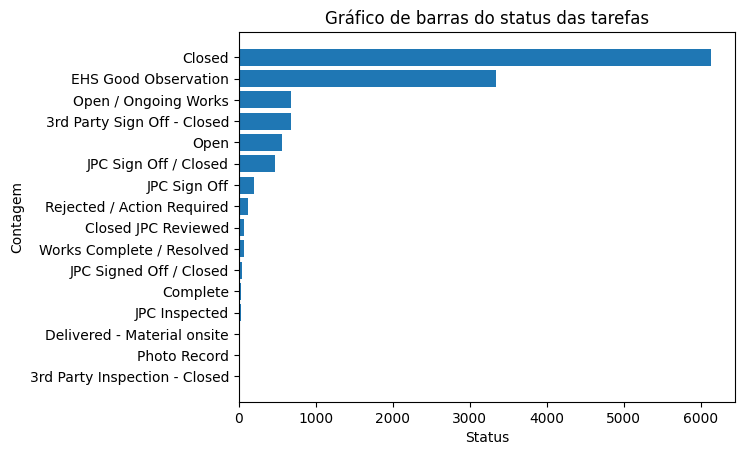

In [14]:
status_counts = data_tasks['Status'].value_counts().sort_values(ascending=True)
status_labels = status_counts.index

plt.barh(status_labels, status_counts)
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.title('Gráfico de barras do status das tarefas')

plt.show()

- O status mais comum das tarefas é "Closed", com 6135 tarefas. 
- As tarefas mais comuns são "EHS Good Observation" e "3rd Party Sign Off - Closed", com 3343 e 678 tarefas, respectivamente. Isso significa que a maioria das tarefas estão relacionadas à aprovação de terceiros.
- As tarefas com o maior número de ações abertas são "JPC Sign Off" e "JPC Sign Off / Closed", com 124 e 69 ações, respectivamente. Isso significa que essas tarefas estão exigindo mais atenção do que as outras tarefas.

Esses insights podem ser usados para melhorar a eficiência e a eficácia do projeto de construção. Por exemplo, o projeto pode tentar aumentar a eficiência das tarefas concluindo-as mais rapidamente, concentrando-se nas tarefas que estão levando mais tempo para serem concluídas e que têm o maior número de ações abertas.

Também é importante notar que o status "Closed" não significa necessariamente que a tarefa foi concluída com sucesso. Por exemplo, uma tarefa pode ser fechada se ela foi cancelada ou se ela foi adiada indefinidamente. Portanto, é importante analisar os dados com cuidado para entender o contexto de cada tarefa



## Percentual de tarefas abertas em relação a outras tarefas

In [ ]:
open_tasks = data_tasks[data_tasks["Status"] == "Open"].count()["Status"]

# Get the total number of tasks
total_tasks = data_tasks.count()["Status"]

# Calculate the percentage of tasks with status "Open"
open_task_percentage = (open_tasks / total_tasks)*100
print(open_task_percentage)

4.491307147456536
